In [ ]:
import pathlib
import random
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hindi_file = '/content/drive/MyDrive/MP/dataset/hi-ta/train.hi'
tamil_file = '/content/drive/MyDrive/MP/dataset/hi-ta/train.ta'

In [ ]:
with open(hindi_file, 'r') as file:
    hindi_sentences = file.readlines()
with open(tamil_file, 'r') as file:
    tamil_sentences = file.readlines()


hindi_sentences = [sentence.rstrip('\n') for sentence in hindi_sentences]
tamil_sentences = [sentence.rstrip('\n') for sentence in tamil_sentences]

In [ ]:
hindi_vocabulary = [ ' ', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख',
                     'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ',
                     'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स',
                     'ह', 'क्ष', 'त्र', 'ज्ञ'
                      ]

tamil_vocabulary = [ ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                      '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
                      "ஃ", "அ", "ஆ", "இ", "ஈ", "உ", "ஊ", "எ", "ஏ", "ஐ", "ஒ", "ஓ", "ஔ",
                      "க", "ங", "ச", "ஜ", "ஞ", "ட", "ண",
                      "த", "ந", "ன", "ப", "ம", "ய", "ர",
                      "ற", "ல", "ள", "ழ", "வ", "ஶ", "ஷ", "ஸ", "ஹ",
                      "ா", "ி", "ீ", "ு", "ூ", "ெ", "ே", "ை", "ொ", "ோ", "ௌ", "்", "ௗ",
                      "௦", "௧", "௨", "௫", "௬", "௲", "௳"
                      ]

In [ ]:
def is_valid_tokens(sentence , vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

valid_sentence_indicies = []
for index in range(len(hindi_sentences)):
    tamil_sentence, hindi_sentence = tamil_sentences[index], hindi_sentences[index]
    if is_valid_tokens(tamil_sentence, tamil_vocabulary) \
      and is_valid_tokens(hindi_sentence , hindi_vocabulary):
        valid_sentence_indicies.append(index)

In [ ]:
x = [hindi_sentences[i] for i in valid_sentence_indicies]
y = [tamil_sentences[i] for i in valid_sentence_indicies]

In [ ]:
import pandas as pd
dataset =  pd.DataFrame({"Tamil":tamil_sentences[:300000], "Hindi":hindi_sentences[:300000] })
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tamil   300000 non-null  object
 1   Hindi   300000 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [ ]:
dataset.sample(5)

Tamil  \
78364   அந்நாட்டு உளவுத்துறை இதுகுறித்து விசாரித்து வர...   
206516  உணவுப் பஞ்சம் நிலவிய சமயத்தில் தமது தீர்க்கதரி...   
130182     ஏன் பெண் காவலர்களை உடன் அழைத்துச் செல்லவில்லை?   
32829   அந்தப் பகுதியில் பலத்த போலீஸ் பாதுகாப்பு போடப்...   
212171  நம்முடைய ஆவிக்குரிய தசமபாகமாக நாம் எதை நிச்சயம...   

                                                    Hindi  
78364               पुलिस इस मामले में विवेचना कर रही है।  
206516  परमेश्‍वर के वचन पर विश्‍वास होने से हमें यह प...  
130182  वहां मौजूद महिला पुलिसकर्मियों ने कोई कार्रवाई...  
32829          क्षेत्र में पुलिस की प्रभावी उपस्थिति रहे।  
212171  एक बात तो यह है कि हम यहोवा को अपना समय और शक्...

In [ ]:
dataset.to_csv('/content/drive/MyDrive/MP/data.csv' , index = False )

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/MP/data.csv')
dataset.head()

Tamil  \
0                  அதனால் நாங்கள் பயன்படைந்துள்ளோம்.   
1                             நோய் நீங்கப் பெற்றார்.   
2  கடந்த சில மாதங்களாக அவர் தவணை செலுத்தவில்லை என...   
3                       காட்ராக்ட் ஆபரேஷன் செய்தோம்.   
4    நாம் பணியாற்றுவதற்கு சம்பளம் வழங்கப்படுவதில்லை.   

                                               Hindi  
0                          इसलिए हम लागू कर रहे हैं।  
1                                   आपको कोई रोग है।  
2  बताया जा रहा है कि इन्हें पिछली तनख्वाह भी कई ...  
3                        हमने सर्जिकल स्ट्राइक किया।  
4                          हम ब्याज अदा नहीं करेंगे।

In [ ]:
text_pairs = []

for i in range(dataset.shape[0]) :
    tam = str(dataset["Tamil"][i])
    hin = "[start] " + str(dataset["Hindi"][i]) + " [end]"
    text_pairs.append((tam,hin))

In [ ]:
len(text_pairs)

300000

In [ ]:
train_sample_size = len(text_pairs) - int(0.1*len(text_pairs))
train_pairs = text_pairs[:train_sample_size]
test_pairs = text_pairs[train_sample_size:]

print("Total pairs :", len(text_pairs))
print("Train pairs :", len(train_pairs))
print("Test pairs :", len(test_pairs))

Total pairs : 300000
Train pairs : 270000
Test pairs : 30000


In [ ]:
strip_chars = string.punctuation + "|"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
strip_chars = strip_chars.replace('""', "")

vocab_size = 50000
sequence_length = 30
batch_size = 128

In [ ]:
def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

In [ ]:
tam_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)

hin_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization,
)

In [ ]:
train_tam_texts = [pair[0] for pair in train_pairs]
train_hin_texts = [pair[1] for pair in train_pairs]
tam_vectorization.adapt(train_tam_texts)
hin_vectorization.adapt(train_hin_texts)

In [ ]:
import json

# Get the vocabulary
tam_vocab = tam_vectorization.get_vocabulary()
hin_vocab = hin_vectorization.get_vocabulary()


# Save the vocabulary
with open('/content/drive/MyDrive/MP/vectorizers/tam_vocab.json', 'w') as f:
    json.dump(tam_vocab, f)
with open('/content/drive/MyDrive/MP/vectorizers/hin_vocab.json', 'w') as f:
    json.dump(hin_vocab, f)


In [ ]:
import json


vocab_size = 50000
sequence_length = 30
batch_size = 128


# Load the vocabulary
with open('/content/drive/MyDrive/MP/vectorizers/tam_vocab.json', 'r') as f:
    tam_vocab = json.load(f)
with open('/content/drive/MyDrive/MP/vectorizers/hin_vocab.json', 'r') as f:
    hin_vocab = json.load(f)

# Create a TextVectorization layer with the loaded vocabulary
tam_vectorization = TextVectorization(vocabulary=tam_vocab,output_mode="int", output_sequence_length=sequence_length)
hin_vectorization = TextVectorization(vocabulary=hin_vocab,output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization)

In [ ]:
def format_dataset(tam, hin):
    tam = tam_vectorization(tam)
    hin = hin_vectorization(hin)
    return ({"encoder_inputs": tam, "decoder_inputs": hin[:, :-1],}, hin[:, 1:])

In [ ]:
def make_dataset(pairs):
    tam_texts, hin_texts = zip(*pairs)
    tam_texts = list(tam_texts)
    hin_texts = list(hin_texts)
    dataset = tf.data.Dataset.from_tensor_slices((tam_texts, hin_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()

In [ ]:
train_ds = make_dataset(train_pairs)
test_ds = make_dataset(test_pairs)

In [ ]:
for inputs, targets in train_ds.take(2):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (128, 30)
inputs["decoder_inputs"].shape: (128, 30)
targets.shape: (128, 30)
inputs["encoder_inputs"].shape: (128, 30)
inputs["decoder_inputs"].shape: (128, 30)
targets.shape: (128, 30)


In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [ ]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

In [ ]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2  = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )

        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

In [ ]:
embed_dim = 512
latent_dim = 1024
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

In [ ]:
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

In [ ]:
decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                                
                                                                                                  
 positional_embedding (Posi  (None, None, 512)            2561536   ['encoder_inputs[0][0]']      
 tionalEmbedding)                                         0                                       
                                                                                                  
 decoder_inputs (InputLayer  [(None, None)]               0         []                            
 )                                                                                      

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

  def get_config(self):
    return {"d_model": self.d_model.numpy(), "warmup_steps": self.warmup_steps}

In [ ]:
learning_rate = CustomSchedule(latent_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

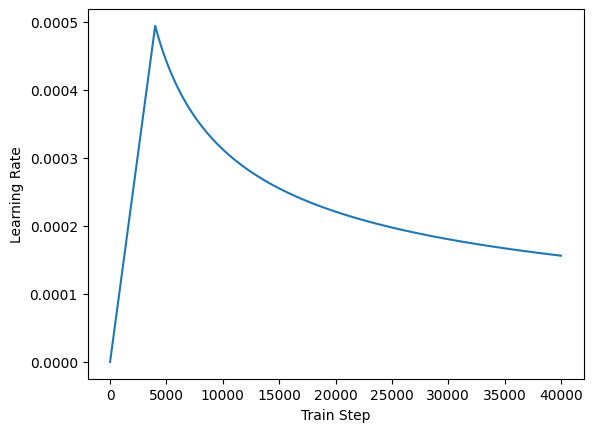

In [ ]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint_filepath = '/content/drive/MyDrive/MP/checkpoint'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

csv_logger = callbacks.CSVLogger('/content/drive/MyDrive/MP/training_log.csv' , append=True)


backup_callback = callbacks.BackupAndRestore(backup_dir="/content/drive/MyDrive/MP/backup" ,
                                             delete_checkpoint=False)

In [ ]:
epochs = 15
transformer.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
transformer.load_weights('/content/drive/MyDrive/MP/checkpoint/')

In [ ]:
history = transformer.fit(train_ds,
                epochs=epochs,
                validation_data=test_ds ,
                callbacks=[
                      early_stopping ,
                      model_checkpoint_callback ,
                      csv_logger ,
                      backup_callback ])

Epoch 10/15
2110/2110 [==============================] - 1184s 545ms/step - loss: 2.8680 - accuracy: 0.5310 - val_loss: 3.6216 - val_accuracy: 0.4309
Epoch 11/15
2110/2110 [==============================] - 1119s 530ms/step - loss: 2.7629 - accuracy: 0.5500 - val_loss: 3.6929 - val_accuracy: 0.4287
Epoch 12/15
2110/2110 [==============================] - 1125s 533ms/step - loss: 2.6680 - accuracy: 0.5676 - val_loss: 3.7656 - val_accuracy: 0.4262
Epoch 13/15
2110/2110 [==============================] - 1118s 530ms/step - loss: 2.5823 - accuracy: 0.5840 - val_loss: 3.8282 - val_accuracy: 0.4251
Epoch 14/15
2110/2110 [==============================] - 1119s 530ms/step - loss: 2.5032 - accuracy: 0.5993 - val_loss: 3.8908 - val_accuracy: 0.4219
Epoch 15/15
2110/2110 [==============================] - 1123s 532ms/step - loss: 2.4293 - accuracy: 0.6137 - val_loss: 3.9642 - val_accuracy: 0.4197


In [ ]:
transformer.save('/content/drive/MyDrive/MP/V1-50k-106M.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
transformer.load_model('/content/drive/MyDrive/MP/V1-50k-106M.h5')

In [ ]:
import os
def plot_loss_and_accuracy(history, save_dir=None, filename=None):
    # Extract the loss and accuracy values from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    # Save the figure if save_dir and filename are provided
    if save_dir and filename:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path)
        print(f"Plots saved as '{save_path}'")

    plt.show()
plot_loss_and_accuracy(history ,"/content/drive/MyDrive/NMT-Project", "V1-50k-106M_trainloss.png" )

In [ ]:
hin_vocab = hin_vectorization.get_vocabulary()
hin_index_lookup = dict(zip(range(len(hin_vocab)), hin_vocab))
max_decoded_sentence_length = 20

In [ ]:
def decode_sequence(input_sentence):
    tokenized_input_sentence = tam_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = hin_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = hin_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    return decoded_sentence

In [ ]:
sample  = random.choice(train_pairs)
input_sentence = sample[0]
translated = decode_sequence(input_sentence)
print('Tamil - ' , input_sentence )
print('Hindi' )
print('Ground Truth : ', sample[1])
print('Machine Translation : ' , translated )

Tamil -  இதுவரை பலியானோர் எண்ணிக்கை 16 லட்சமாக உயர்ந்துள்ளது.
Hindi
Ground Truth :  [start] इसके बाद मृतकों की संख्य़ा बढ़कर 16 हो गई है. [end]
Machine Translation :  [start] इसके अलावा 16 लाख लोगों को [UNK] मिल चुका है। [end]


In [ ]:
sample  = random.choice(test_pairs)
input_sentence = sample[0]
translated = decode_sequence(input_sentence)
print('Tamil - ' , input_sentence )
print('Hindi' )
print('Ground Truth : ', sample[1])
print('Machine Translation : ' , translated )

Tamil -  மேடை அமைப்புகளையும் ஒப்பனைகளையும் தயாரிப்பதற்கு எந்தளவுக்கு பெரும் ஆராய்ச்சி செய்யப்படுகிறது என்பதைப் பற்றி ஓரளவுக்கு அவர்களால் அறிந்துகொள்ள முடிந்தது.
Hindi
Ground Truth :  [start] मेन बिल्डिंग की पहली मंजिल पर गिलियड स्कूल था और उसके अंदर जाते ही स्कूल के इतिहास और उसकी अहमियत को बतानेवाली तस्वीरें दिखाई गई थीं । [end]
Machine Translation :  [start] और यह भी कि कुछ ऐसे मामलों में परमेश्‍वर की सेवा करने के बारे में क्या यह सच है कि


In [ ]:
import pandas as pd
import random

data = []

def remove_start_end(sentence):
    output = re.sub(r'\[start\]', '', sentence)
    output = re.sub(r'\[end\]', '', output)
    return output.strip()

for _ in range(200):
    sample = random.choice(train_pairs)
    input_sentence = sample[0]
    translated = decode_sequence(input_sentence)

    data.append({
        'Tamil': input_sentence,
        'Actual': remove_start_end(sample[1]),
        'Transformer-Prediction': remove_start_end(translated)
    })

df = pd.DataFrame(data)
df.to_excel('/content/drive/MyDrive/MP/translation_data-1.xlsx', index=False)

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,270 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/local/bin/pytesseract')

In [ ]:
from PIL import Image
import pytesseract

img = r'/content/drive/MyDrive/MP/test/tamil.png'
text = pytesseract.image_to_string(Image.open(img), lang='tam')

input_sentence = text
translated = decode_sequence(input_sentence)
print('Tamil - ' , input_sentence )
print('Hindi' )
print('Machine Translation : ' , translated )


In [ ]:
input_sentence = '''
இச்‌,௪ லைபிரேரியில்‌, அகத்தியர்‌, சேசையர்‌, சட்டை
மூனி, மச்சமுனி, பிரமமுனி, யூ௫முனி, ;போகர்‌, சொல்க'''

translated = decode_sequence(input_sentence)
print('Tamil - ' , input_sentence )
print('Hindi' )
print('Machine Translation : ' , translated )

Tamil -  
இச்‌,௪ லைபிரேரியில்‌, அகத்தியர்‌, சேசையர்‌, சட்டை
மூனி, மச்சமுனி, பிரமமுனி, யூ௫முனி, ;போகர்‌, சொல்க
Hindi
Machine Translation :  [start] और [UNK] का अर्थ है कि [UNK] में [UNK] [UNK] [UNK] [end]
